<a href="https://colab.research.google.com/github/RapaDewan/Machine-Learning/blob/main/FCC18/FCC18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lesson 1

In [11]:
!pip install pandas-profiling --quiet

In [12]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd


In [14]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/medical-charges.csv')

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df.shape

(1338, 7)

In [17]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
!pip install jovian --quiet


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 1.8 MB/s eta 0:00:00


In [20]:
import jovian

In [21]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [22]:
!pip install plotly matplotlib seaborn --quiet


In [23]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [25]:
df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [26]:
fig=px.histogram(df, x='age', marginal='box',nbins=47,title='dist of age')

fig.update_layout(bargap=0.1)
fig.show()

In [27]:
fig=px.histogram(df, x='bmi', marginal='box',nbins=47,title='Dist of BMI', color_discrete_sequence=['red'])

fig.update_layout(bargap=0.1)
fig.show()

In [28]:
fig=px.histogram(df, x='charges', marginal='box',color='smoker',nbins=47,title='Dist of charges', color_discrete_sequence=['green','gray'])

fig.update_layout(bargap=0.1)
fig.show()

In [29]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [30]:
fig=px.histogram(df, x='smoker', color='sex', title="Figue: Smoker",color_discrete_sequence=['gray','red'])
fig.show()


In [31]:
fig=px.histogram(df, x='sex', marginal='box',nbins=47,title='Dist of charges', color_discrete_sequence=['green'])

fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig=px.scatter(df, x='age',y='charges', color='smoker', opacity=0.8,hover_data=['sex'], title='Age VS. Charges' )
fig.update_traces(marker_size=5)
fig.show()

In [33]:
fig=px.scatter(df, x='bmi',y='charges', color='smoker', opacity=0.9,hover_data=['sex'], title='BMI VS. Charges' )
fig.update_traces(marker_size=5)
fig.show()

Correlation

In [34]:
df.charges.corr(df.age)

0.2990081933306476

In [35]:
df.charges.corr(df.bmi)

0.19834096883362895

In [38]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df.smoker.map(smoker_values)
df.charges.corr(smoker_numeric)

0.787251430498478

In [40]:
#df.corr() #prblm

In [42]:
#sns.heatmap(df.corr(), cmap='Reds', annot=True)
#plt.title('Correlation Matrix')

ValueError: could not convert string to float: 'female'

In [43]:
non_smoker_df=df[df.smoker=='no']

Text(0.5, 1.0, 'Age vs.Charges')

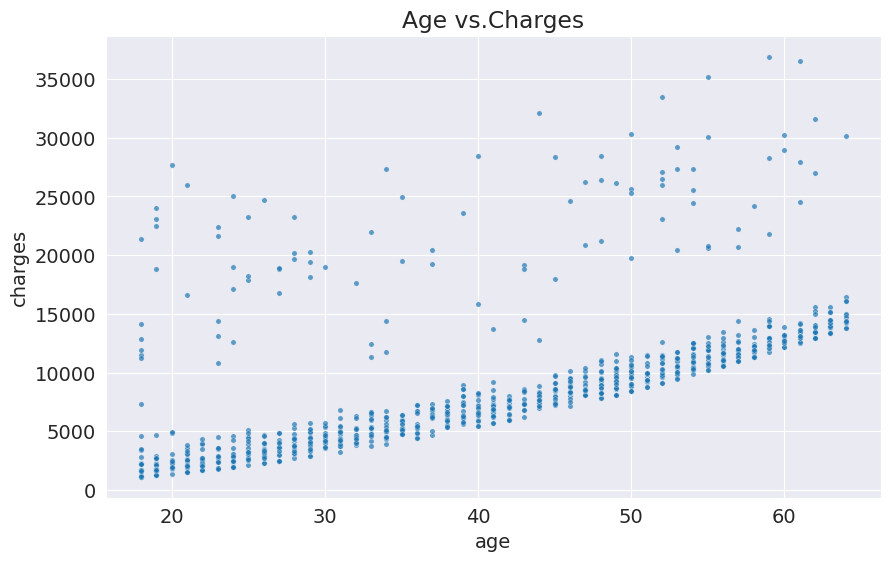

In [44]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7,s=15)
plt.title("Age vs.Charges")

In [73]:
def estimate_charges(age,w,b):
  return w*age+b

In [46]:
w=50
b=100

In [74]:
estimate_charges(50,w,b)

2600

In [75]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

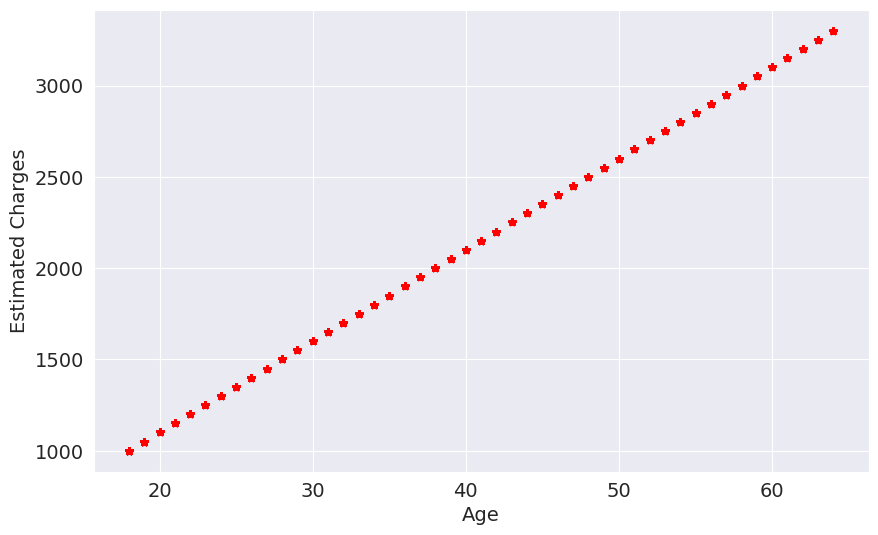

In [76]:
plt.plot(ages, estimated_charges, 'r*');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

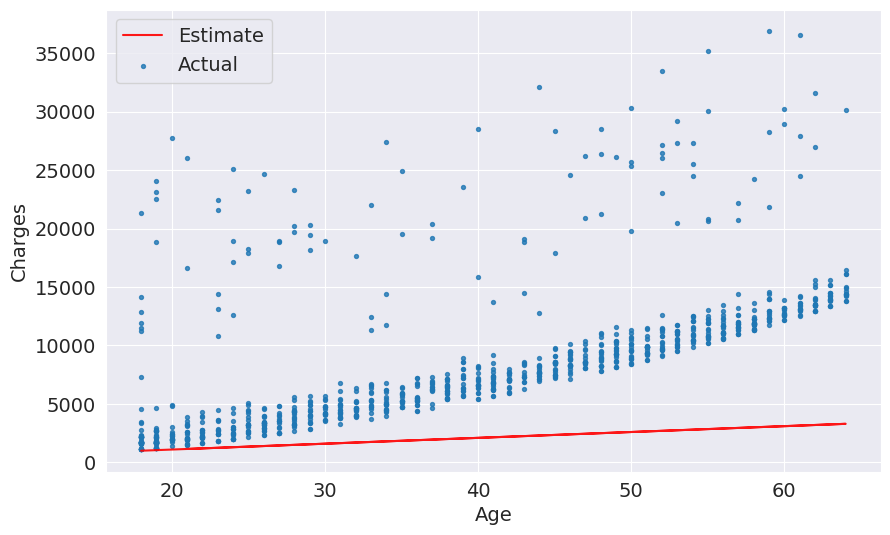

In [77]:
target = non_smoker_df.charges
plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [78]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    estimated_charges = estimate_charges(ages, w, b)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')

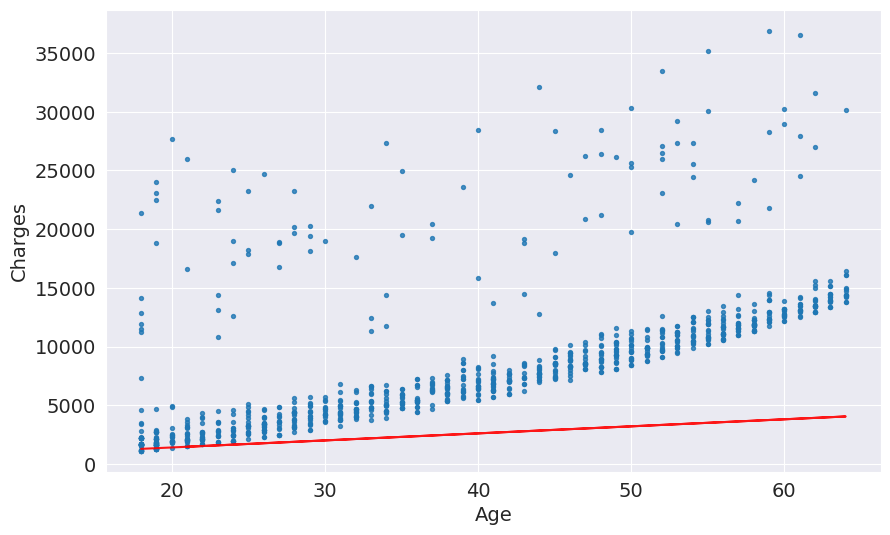

In [79]:
try_parameters(60, 200) ##ekhane prb ta ki? Same vabe krsi but still error


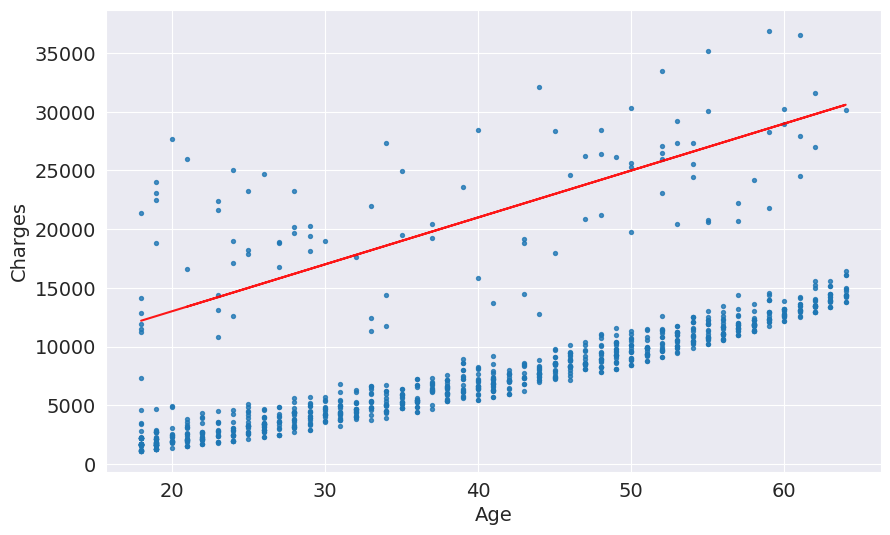

In [80]:
try_parameters(400, 5000)#ekhane prb ta ki? Same vabe krsi but still error


In [54]:
!pip install numpy --quiet

In [55]:
import numpy as np

In [56]:
targets=non_smoker_df.charges
targets

,charges
1,1725.552300
2,4449.462000
3,21984.470610
4,3866.855200
5,3756.621600
6,8240.589600
7,7281.505600
8,6406.410700
9,28923.136920
10,2721.320800


In [58]:
predictions= estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
6,2400
7,1950
8,1950
9,3100
10,1350


In [91]:
 def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [92]:
w=50
b=100

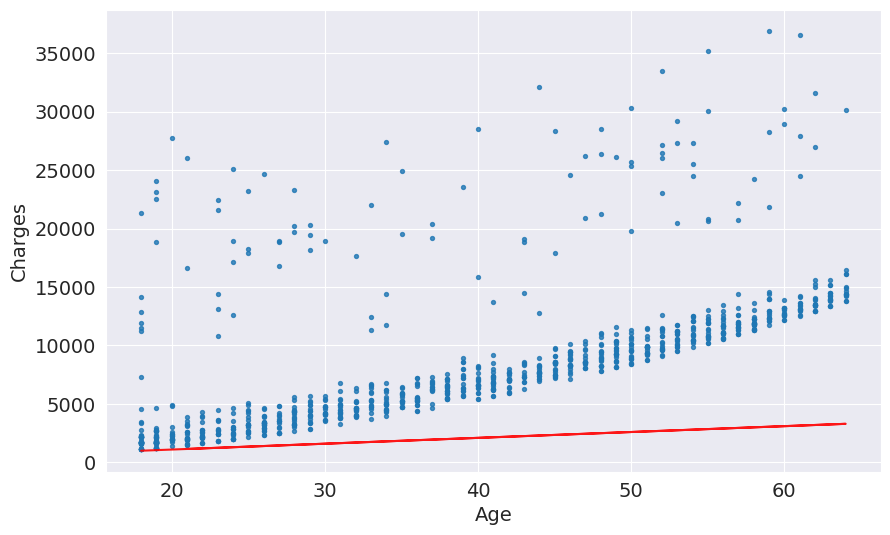

In [93]:
try_parameters(w,b)

In [94]:
targets =non_smoker_df['charges']
predicted=estimate_charges(non_smoker_df.age,w,b)

In [95]:
rmse(targets, predicted)



8461.949562575493

In [96]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  8461.949562575493


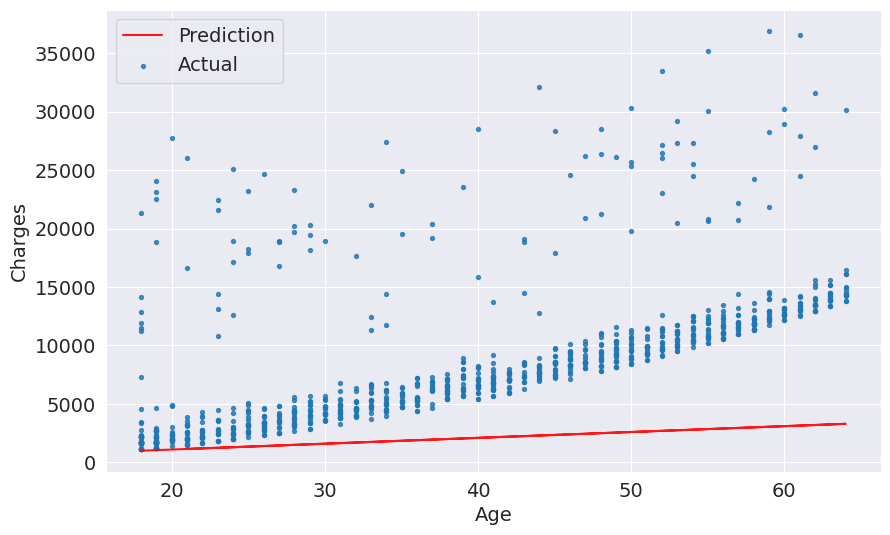

In [97]:
try_parameters(50,100)

Optimizer

RMSE Loss:  8844.184065256362


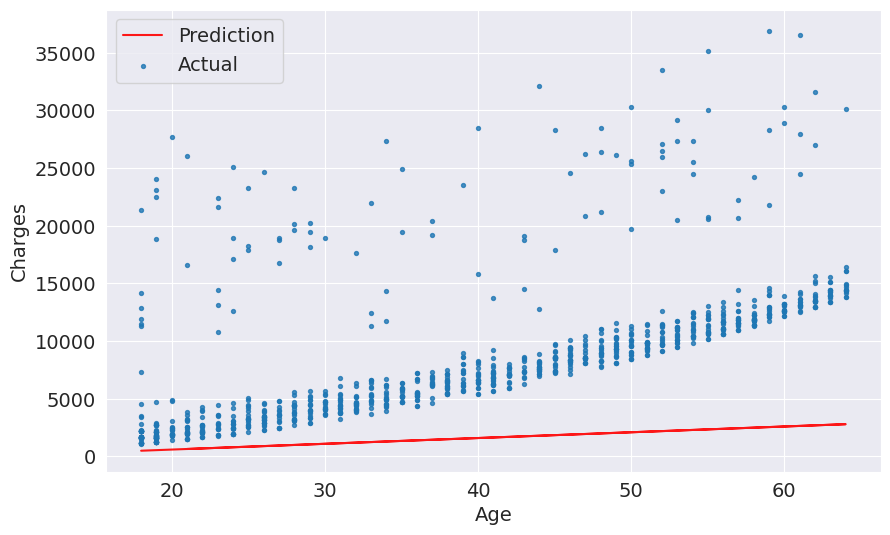

In [99]:
try_parameters(50,-400)

RMSE Loss:  8312.556156041677


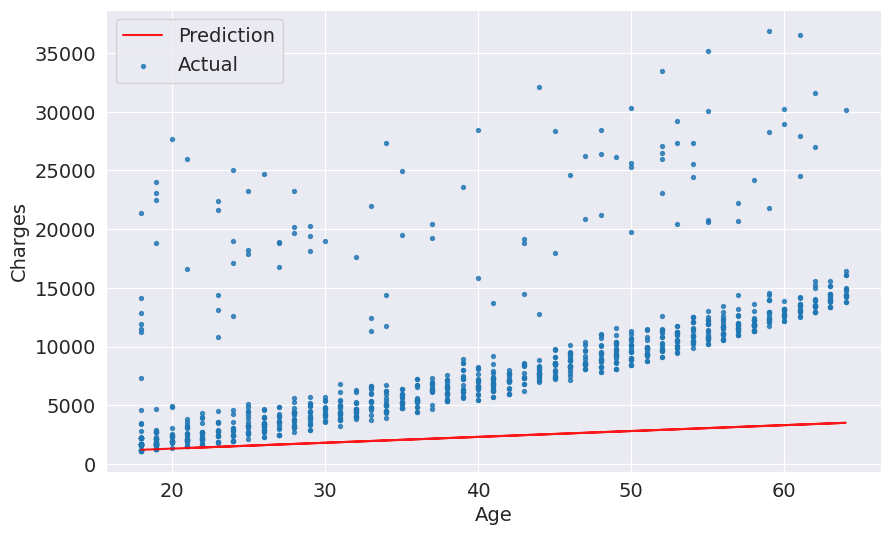

In [98]:
try_parameters(50,300)